<a href="https://colab.research.google.com/github/Armandosky/Analitica_Datos/blob/main/ParcialAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARCIAL II**

### Integrantes:
*   Armando Enrique Cortés González 000430669

*   Juan Sebastián Arguello Lozano  000345476




## *Punto 1*

Realizar un algoritmo que me permita identificar el latido cardiaco en una señal ECG utilizando
patrones (características obtenidas de segmentos de la señal) usando como método o camino para
ello SVM. El número de características a evaluar debe ser mayor a 8, sin límite máximo de cantidad
de ellas. Además, debe optimizar hiperparámetros para buscar mejorar el desempeño
previamente obtenido. Deben utilizar la validación cruzada para esta parte.



**NOTA 1**: Este algoritmo se realizará sin desplazamiento de una ventana deslizante. Es decir, se
realizará dentro de un conjunto de datos, en donde este debe contener las características y la
salida o categoría de estas características (tal como en la base de datos de cáncer).


**NOTA 2**: Empezar con un tamaño de base de datos de más de 400.000 registros, si no alcanzan el
desempeño objetivo pueden ir reduciendo paulatinamente esta hasta llegar a 70.000.


Debe preparar un pequeño informe en notebook en donde se evidencia el código utilizado. Las
diferentes pruebas, las observaciones que puede generar y algunas conclusiones de ellas.

Para subir los datos a usar, por favor crear una carpeta en los archivos de Google Colab en la carpeta "content" llamada "db" y alojar ahí los archivos de la señal ECG.

Nota: Dichos datos se pueden encontrar en https://www.physionet.org/content/nsrdb/1.0.0/

## **Creación del Dataset**

Debido a que solo se poseen las señales ECG, hay que crear un dataset que tenga 8 características en base a los latidos obtenidos.

Se solicita un mínimo de 8 características de las señales a evaluar, por lo que se decidió evaluar las siguientes:

*   Media
*   Mediana
*   Moda
*   Varianza
*   Desviación Estándar
*   Curtosis
*   Asimetría
*   Percentil 50


Primero que nada, se realiza la instalación de la libreria WFDB, la cual es una librería para ver, analizar y crear grabaciones de señales fisiológicas, en este caso señales de un electrocardiograma, además de importar otras librerías.

```
#Instalación WFDB
!pip install wfdb

#Librerías
import statistics as stats
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import wfdb
```



A continuación, se mostrará el código usado para la creación del dataframe



```
archivos = ['16265', '16272', '16273', '16420', '16483', '16539', '16773', '16786',
    '16795', '17052', '17453', '18177', '18184', '19088', '19090', '19093', '19140', '19830']
n_data = 400500
range = 20

# Función moda

def mode(list_data):
  max_count = (0, 0)
  for num in list_data:
    occurences = list_data.count(num)
    if occurences > max_count[0]:
      max_count = (occurences, num)
  return max_count[1]

#Función con las 8 características 
def list_features(segmento):
    features = []
    media = stats.mean(segmento)
    features.append(media)
    mediana = stats.median(segmento)
    features.append(mediana)
    moda = mode(list(segmento))
    features.append(moda)
    varianza = stats.pvariance(segmento)
    features.append(varianza)
    desviacion_estandar = stats.pstdev(segmento)
    features.append(desviacion_estandar)
    curtosis = kurtosis(segmento)
    features.append(curtosis)
    asimetria = skew(segmento)
    features.append(asimetria)
    percentil50 = stats.median_grouped(segmento)
    features.append(percentil50)
    features.append(1)
    return features

columnas = {'Media':[],'Mediana':[],'Moda':[],'Varianza':[],'Desviación Estandar':[],'Curtosis':[],'Asimetría':[],'Percentil 50':[],'Output':[]}
df = pd.DataFrame(data = columnas)

for i in range(18):
    lectura = wfdb.rdrecord('/content/db/'+archivos[i], sampto=n_data)
    señal = lectura.p_signal
    señal1 = señal[:, 0]
    ann = wfdb.rdann('/content/db/'+archivos[i], 'atr', sampto=n_data)
    ANN = ann.sample
    for j in range(1, len(ANN)):
        feature = señal1[ANN[j]-rango:ANN[j]+rango]
        get_feature = list_features(list(feature))
        newRow = {'Media':get_feature[0],'Mediana':get_feature[1],'Moda':get_feature[2],'Varianza':get_feature[3],'Desviación Estandar':get_feature[4],'Curtosis':get_feature[5],'Asimetría':get_feature[6],'Percentil 50':get_feature[7],'Output':int(get_feature[8])}
        df = pd.concat([df, pd.DataFrame.from_records([newRow])])
        try:
            feature2 = señal1[ANN[j]+rango:ANN[j+1]-rango]
            if len(feature2) > 30:
                get_feature2 = list_features(list(feature2))
                newRow2 = {'Media':get_feature2[0],'Mediana':get_feature2[1],'Moda':get_feature2[2],'Varianza':get_feature2[3],'Desviación Estandar':get_feature2[4],'Curtosis':get_feature2[5],'Asimetría':get_feature2[6],'Percentil 50':get_feature2[7],'Output':0}
                df = pd.concat([df, pd.DataFrame.from_records([newRow2])])
        except:
            print("Fuera del rango")


```


Luego de obtener el dataframe, se convierte este en un archivo .csv, esto para tenerlo a la mano, evitando así tener que correr todo el código una y otra vez, cosa que necesitaría mucho tiempo debido a los grandes recursos que consume.

```
print(df)
df.to_csv('ecg.csv')
```



Nota: Antes de ejecutar, por favor subir el archivo "ecg.csv" a Colab, el cual está alojado en la tarea enviada

In [11]:
#Librerías
import statistics as stats
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

In [20]:
archivo = "ecg.csv"
df = pd.read_csv(archivo, engine="python")

In [21]:
df

,Media,Mediana,Moda,Varianza,Desviación Estandar,Curtosis,Asimetría,Percentil 50,Output
0,0.042250,-0.190,-0.215,0.617760,0.785977,5.273880,2.519110,-0.685000,1.0
1,-0.135541,-0.135,-0.115,0.000789,0.028087,-0.139779,0.267538,-0.051667,0.0
2,0.060750,-0.180,-0.275,0.641839,0.801149,5.902141,2.615740,-0.675000,1.0
3,-0.121579,-0.115,-0.105,0.000801,0.028310,0.521682,-1.184300,0.085000,0.0
4,0.071750,-0.160,-0.155,0.648602,0.805358,5.303545,2.520852,-0.655000,1.0
...,...,...,...,...,...,...,...,...,...
295121,0.282500,0.270,0.445,0.064134,0.253246,1.320492,0.959239,-0.215000,1.0
295122,-0.388750,-0.460,-0.595,0.069388,0.263417,3.772974,1.723137,-0.945000,1.0
295123,-0.776750,-0.800,-0.645,0.061369,0.247729,4.824382,1.899111,-1.295000,1.0
295124,-0.979750,-1.045,-1.135,0.044720,0.211471,6.164108,2.367984,-1.535000,1.0


In [15]:
#Nulos

df.isnull().sum()

Media                  0
Mediana                0
Moda                   0
Varianza               0
Desviación Estandar    0
Curtosis               0
Asimetría              0
Percentil 50           0
Output                 0
dtype: int64

In [25]:
X = df.loc[:, df.columns != "Output"]
Y = df.loc[:, "Output"]

In [26]:
Y

0         1.0
1         0.0
2         1.0
3         0.0
4         1.0
         ... 
295121    1.0
295122    1.0
295123    1.0
295124    1.0
295125    1.0
Name: Output, Length: 295126, dtype: float64

In [27]:
#Entrenamiento 

x_train, x_test, y_train, y_test = train_test_split(
                                        X,
                                        Y,
                                        train_size = 0.7
                                    )   

## **Creando la Máquina de Soporte Vectorial (SVM)**

In [28]:
#Normalizar las características

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [ ]:
# Optimización del hiperparámetro

for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(x_train, y_train)
    predictions = model.predict(x_train)
    print(k)
    print(accuracy_score(y_train, predictions))

linear
0.9722781574922067


In [29]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)


x_test = scaler.transform(x_test)
predictions = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.9724750954392464


El puntaje de precisión es de 0.9724750954392464

In [31]:
#Validación cruzada

kf = KFold(n_splits=10)
scores = cross_val_score(model, X, Y, cv = kf, scoring="accuracy")
print("Validación cruzada", scores.mean())

Validación cruzada 0.9547073504104862


El puntaje de la validación cruzada es de 0.9547073504104862

## *Punto 2*

Realizar un esquema de fusión de detectores por votación con el anterior numeral, en donde la
cantidad de detectores a utilizar debe ser igual a 3. Deben optimizar al menos 2 hiperparámetros
de los otros detectores usando la validación cruzada.


*Deben Concluir la razón de por que el desempeño mejora o empeora con el anterior numeral.*

El punto 2 se encuentra en el siguiente enlace, debido a problemas con el trabajo simultáneo en el mismo archivo.

Arguello: https://colab.research.google.com/drive/1w9J5WLWL457urSthZ2xZwlF1eGcGMQqY?usp=sharing

## Punto 3

Usando la base de datos de calidad de aire crear una red neuronal con no más de 5 parámetros de
entrada. Deben optimizar hiperparámetros junto a una validación cruzada para alcanzar un
desempeño superior a 0.81. En caso que no alcancen se debe utilizar esquemas de fusión de
detectores.


En caso que con la función de detectores no alcance el desempeño deben calcular el desempeño
de manera individual y reportarlos.


***Nota: NO SE PERMITE ELIMINAR ATIPICOS.***

## INFORMACIÓN DEL DATASET

El dataset contiene 9358 instancias de respuestas promediadas por hora de un conjunto de 5 sensores químicos de óxido metálico integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba situado sobre el terreno en una zona significativamente contaminada, a nivel de carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año), lo que representa el mayor registro disponible de respuestas de dispositivos de sensores químicos de calidad del aire desplegados sobre el terreno. Las concentraciones medias horarias de CO, hidrocarburos no metálicos, benceno, óxidos de nitrógeno (NOx) y dióxido de nitrógeno (NO2) fueron proporcionadas por un analizador de referencia certificado. Existen evidencias de sensibilidades cruzadas, así como de desviaciones del concepto y del sensor, como se describe en De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (cita requerida) afectando eventualmente a las capacidades de estimación de la concentración de los sensores. Los valores perdidos se etiquetan con el valor -200.

Este dataset puede utilizarse exclusivamente con fines de investigación. Los fines comerciales están totalmente excluidos.


In [5]:
#Librerías

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
#Dataset

archivo = 'https://raw.githubusercontent.com/Armandosky/Analitica_Datos/main/AirQualityUCI.csv'
air = pd.read_csv(archivo, engine="python", sep= ";")

In [7]:
air.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [8]:
air

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Nulos

air.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [ ]:
#Eliminamos columnas extras

air.drop('Unnamed: 15', inplace=True, axis=1)

air.drop('Unnamed: 16', inplace=True, axis=1)

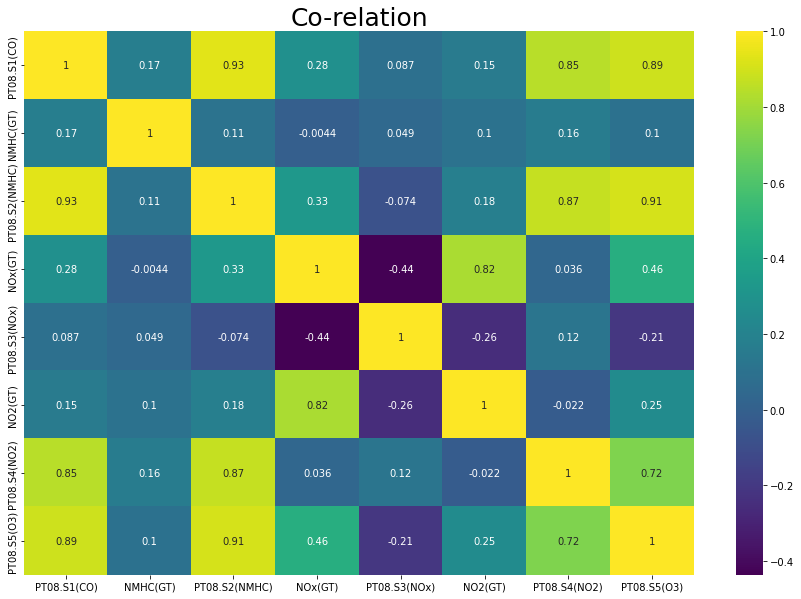

In [ ]:
corrmat = air.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(15,10))
plt.title('Co-relation', fontsize=25)
# to plot heat map
g=sns.heatmap(air[top_corr_feature].corr(),annot=True,cmap='viridis')

In [ ]:
#Eliminar -200

air.replace(to_replace=-200,value=np.nan,inplace=True)

In [ ]:
air

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Eliminamos datos nulos

clean_air = air.dropna(how='any', axis=0)
clean_air.reset_index(drop=True,inplace=True)

In [ ]:
clean_air

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,30/04/2004,20.00.00,"4,4",1449.0,501.0,"19,5",1282.0,254.0,625.0,133.0,2100.0,1569.0,"19,1","61,1","1,3345"
847,30/04/2004,21.00.00,"3,1",1363.0,234.0,"15,1",1152.0,189.0,684.0,110.0,1951.0,1495.0,"18,2","65,4","1,3529"
848,30/04/2004,22.00.00,3,1371.0,212.0,"14,6",1136.0,174.0,689.0,102.0,1927.0,1471.0,"18,1","66,1","1,3579"
849,30/04/2004,23.00.00,"3,1",1406.0,275.0,"13,7",1107.0,167.0,718.0,108.0,1872.0,1384.0,"17,7","66,9","1,3422"


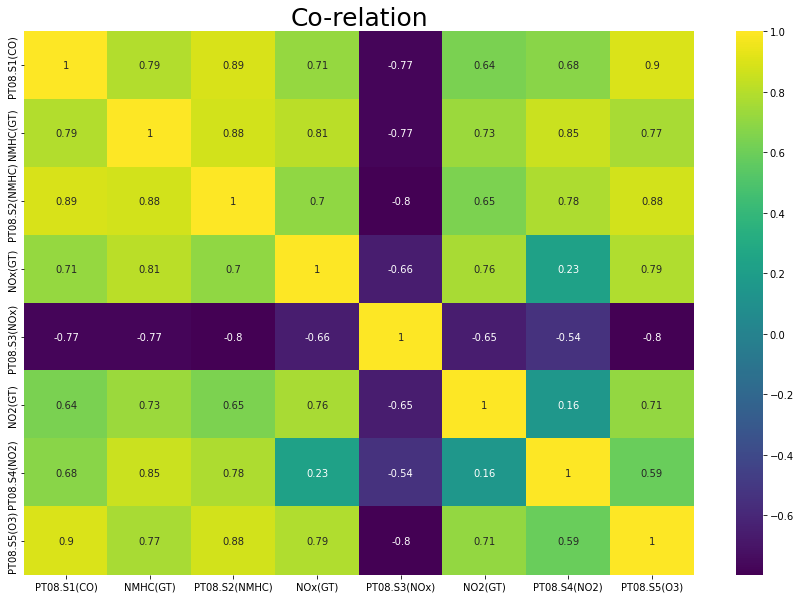

In [ ]:
corrmat = clean_air.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(15,10))
plt.title('Co-relation', fontsize=25)
# to plot heat map
g=sns.heatmap(air[top_corr_feature].corr(),annot=True,cmap='viridis')

In [ ]:
clean_air.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [ ]:
#Cambiar comas por puntos

clean_air["CO(GT)"] = clean_air["CO(GT)"].replace(',','.',regex=True)
clean_air["C6H6(GT)"] = clean_air["C6H6(GT)"].replace(',','.',regex=True)
clean_air["T"] = clean_air["T"].replace(',','.',regex=True)
clean_air["RH"] = clean_air["RH"].replace(',','.',regex=True)
clean_air["AH"] = clean_air["AH"].replace(',','.',regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
#Convertimos todo a flotante

clean_air["CO(GT)"] = clean_air["CO(GT)"].astype('float64')
clean_air["C6H6(GT)"] = clean_air["C6H6(GT)"].astype('float64')
clean_air["T"] = clean_air["T"].astype('float64')
clean_air["RH"] = clean_air["RH"].astype('float64')
clean_air["AH"] = clean_air["AH"].astype('float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
clean_air.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [ ]:
# Definimos X y Y

X = clean_air[['NMHC(GT)','C6H6(GT)','NOx(GT)','NO2(GT)', 'RH']]
y = clean_air[['CO(GT)']]


In [ ]:
#Creamos categorías en base al CO(GT)

def classification(n):
    if(n > 0 and n <= 2.5):
        return 0
    elif(n > 2.5 and n <= 5):
        return 1
    else:
        return 2
        
y_array = []

for i  in y.index:
    y_array.append(classification(y['CO(GT)'][i]))

Y = pd.DataFrame(y_array)

In [ ]:
Y.value_counts()

0    507
1    277
2     67
dtype: int64

### **NEURAL NETWORK**

In [ ]:
# Entrenamiento

x_train, x_test, y_train, y_test = train_test_split(
                                        X,
                                        Y,
                                        train_size   = 0.7
                                    )   

In [ ]:
clf = MLPClassifier()
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
# Mejora de hiperparámetros

parametros = {
"hidden_layer_sizes":((10,),(5,2),(100,),(3,2)),
"activation":("identity","relu","logistic"),
"solver":("sgd","adam"),
"learning_rate":("constant","adaptive"),
"max_iter":(800,1000,1200)
}

In [ ]:
from sklearn.model_selection import GridSearchCV

rejilla = GridSearchCV(clf,parametros,scoring="accuracy")
rejilla.fit(X,Y.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_mul

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ('identity', 'relu', 'logistic'),
                         'hidden_layer_sizes': ((10,), (5, 2), (100,), (3, 2)),
                         'learning_rate': ('constant', 'adaptive'),
                         'max_iter': (800, 1000, 1200),
                         'solver': ('sgd', 'adam')},
             scoring='accuracy')

In [ ]:
print("Mejores parámetros:", rejilla.best_params_)
print("Mejor validación:", rejilla.best_score_)

Mejores parámetros: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 800, 'solver': 'adam'}
Mejor validación: 0.8637426900584796


In [ ]:
#Perceptrón

clf = MLPClassifier(learning_rate= 'constant', max_iter=800, solver='adam', hidden_layer_sizes=(100,), activation='logistic').fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Exactitud

print("Accuracy", clf.score(x_test, y_test))

# Validación cruzada

kf = KFold(n_splits=10)
scores = cross_val_score(clf, X, Y.values.ravel(), cv = kf, scoring="accuracy")
print("Validación cruzada", scores.mean())

Accuracy 0.90625
Validación cruzada 0.8590834473324215


### **Conclusión**:

Se puede apreciar que se logró llegar a un puntaje de desempeño bastante alto, llegando a ser de más de 0.90 y también una validación cruzada de 0.859. 

En ambos casos, se superó el porcentaje mínimo, el cual era de 0.81; demostrando así que se pueden obtener buenos resultados usando solo una red neuronal y optimizando los parámetros de la misma, los cuales fueron en este caso los tamaños de la capa oculta, la función de activación, el solucionador, el horario de la tasa de aprendizaje y por último, la cantidad máxima de iteraciones.